In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from os import listdir

In [81]:
train = []
dev = []
dire = 'D:/College/PRML/Assgn 3/DTW/Hand Written/'
for path in ['bA', 'chA', 'dA', 'lA', 'tA']:
    files = listdir(dire+path+'/train')
    temp = []
    for file in files:
        x = []; y = []; i = 0
        for n in open(dire+path+'/train/'+file).readlines()[0].split()[1:]:
            if i%2==0:
                x.append(n)
            else:
                y.append(n)
            i += 1
        temp.append(np.array([x,y], dtype='float64'))
    train.append(temp)
    
for path in ['bA', 'chA', 'dA', 'lA', 'tA']:
    files = listdir(dire+path+'/dev')
    temp = []
    for file in files:
        x = []; y = []; i = 0
        for n in open(dire+path+'/dev/'+file).readlines()[0].split()[1:]:
            if i%2==0:
                x.append(n)
            else:
                y.append(n)
            i += 1
        temp.append(np.array([x,y], dtype='float64'))
    dev.append(temp)

In [82]:
# Slopes
k = np.pi/2
X_train = []
X_dev = []
for i in range(5):
    temp = []
    for j in range(len(train[i])):
        A = np.diff(train[i][j])
        temp.append(np.nan_to_num(np.arctan(A[1]/A[0]), nan=k))
    X_train.append(temp)
    
    temp = []
    for j in range(len(dev[i])):
        A = np.diff(dev[i][j])
        temp.append(np.nan_to_num(np.arctan(A[1]/A[0]), nan=k))          
    X_dev.append(temp)

C:\Users\PAVAN\AppData\Local\Temp/ipykernel_30516/2999808710.py:9: RuntimeWarning: divide by zero encountered in true_divide
  temp.append(np.nan_to_num(np.arctan(A[1]/A[0]), nan=k))
C:\Users\PAVAN\AppData\Local\Temp/ipykernel_30516/2999808710.py:15: RuntimeWarning: divide by zero encountered in true_divide
  temp.append(np.nan_to_num(np.arctan(A[1]/A[0]), nan=k))


In [83]:
X_train[0][0]

array([ 1.57079633,  1.57079633,  1.57079633,  1.10711852,  0.46367781,
        0.32173545,  0.        ,  0.        ,  0.        , -1.57079633,
       -1.57079633, -1.57079633, -1.57079633,  1.42891135,  1.10711852,
        1.24906087, -1.57079633,  1.10711852, -1.57079633, -0.78539816,
        0.        ,  0.46367781,  0.78532266,  0.78547366,  1.3257999 ,
        1.57079633,  1.10717892,  1.57079633,  1.10711852,  1.57079633,
       -0.78547366, -1.57079633, -1.10714872, -1.10711852, -1.57079633,
       -1.10717892, -0.78539816,  0.        , -0.78532266,  0.        ,
        0.        ,  0.        ,  1.57079633,  1.3257999 ,  1.57079633,
        1.57079633,  1.57079633,  1.10717892,  1.57079633,  1.57079633,
       -0.78547366, -0.78532266,  1.57079633, -0.78539816, -0.        ,
        0.        ,  0.        ,  0.        , -0.32173545, -0.12436429,
       -0.32172035, -0.32178075, -0.321743  , -0.78539816, -1.57079633,
        0.78539816,  0.46361741, -0.        , -0.        , -0.  

In [74]:
def dtw(A, B, window=10):
    n, m = A.shape[0], B.shape[0]
    w = np.max([window, abs(n-m)])
    dtw_matrix = np.zeros((n+1, m+1))
    
    for i in range(n+1):
        for j in range(m+1):
            dtw_matrix[i, j] = np.inf
    dtw_matrix[0, 0] = 0.0
    
    for i in range(1, n+1):
        for j in range(np.max([1, i-w]), np.min([m, i+w])+1):
            dtw_matrix[i, j] = 0.0
    
    for i in range(1, n+1):
        for j in range(np.max([1, i-w]), np.min([m, i+w])+1):
            cost = abs(A[i-1] - B[j-1])
            # take last min from a square box
            last_min = np.min([dtw_matrix[i-1, j], dtw_matrix[i, j-1], dtw_matrix[i-1, j-1]])
            dtw_matrix[i, j] = cost + last_min
            
    return dtw_matrix[n, m]

In [7]:
# def dtw2(s, t, window=10):
#     n, m = s.shape[0], t.shape[0]
#     w = max(window, abs(n-m))
#     dtw_matrix = [[0.0]*(m+1)]*(n+1)
    
#     for i in range(n+1):
#         for j in range(m+1):
#             dtw_matrix[i][j] = float('inf')
#     dtw_matrix[0][0] = 0.0
    
#     for i in range(1, n+1):
#         for j in range(max(1, i-w), min(m, i+w)+1):
#             dtw_matrix[i][j] = 0.0
    
#     for i in range(1, n+1):
#         for j in range(max(1, i-w), min(m, i+w)+1):
#             cost = abs(s[i-1] - t[j-1])
#             # take last min from a square box
#             last_min = min(dtw_matrix[i-1][j], dtw_matrix[i][j-1], dtw_matrix[i-1][j-1])
#             dtw_matrix[i][j] = cost + last_min
#     return dtw_matrix[n][m]

In [84]:
dtw(X_train[0][0], X_dev[0][0])

30.141601948843256

In [ ]:
predictions = []
probabilities = []
with tqdm(total = 343*5*20) as pbar:
    for i in tqdm(range(5), disable=True):
        for j in tqdm(range(len(dev[i])), disable=True):
            distances = []
            temp = []
            for p in tqdm(range(5), disable=True):            
                scores = []
                for q in tqdm(range(len(train[p])), disable=True):
                    score = dtw(train[p][q], dev[i][j])
                    scores.append(score)
                    pbar.update(1)
                distances.append(sum(sorted(scores)[:10]))
                temp.append(1/distances[p])
            probabilities.append(temp)
            predictions.append(distances.index(min(distances)))

In [97]:
for i in range(20*5):
    summ = 0
    for j in range(5):
        summ += probabilities[i][j]
    for j in range(5):
        probabilities[i][j] /= summ

In [ ]:
count_correct = 0
total = 0
for i in range(5):
    total += len(predictions[i])
    for j in predictions[i]:
        if j == i:
            count_correct += 1
print('Accuracy: ', count_correct/total)        

In [101]:
def ROC(probabilities, C, n_classes, Actual):
    probabilities = np.array(probabilities)
    n = probabilities.shape[0]
    S = pd.DataFrame()
    for j in range(n_classes):
        S[j] = probabilities[:, j] * C[j]
    S = S.to_numpy()
    TPR = []; FPR = []

    for threshold in np.linspace(S.min(), S.max(), 1000):
        TP = FP = TN = FN = 0.0

        for i in range (n):
            for j in range (n_classes):
                if(S[i,j] >= threshold):
                    if Actual[i] == j:
                        TP += 1
                    else:
                        FP += 1

                else:
                    if Actual[i] == j:
                        FN += 1
                    else:
                        TN += 1

        TPR.append(TP/(TP + FN))
        FPR.append (FP/(FP+ TN))

    FPR, TPR = zip(*sorted (zip (FPR, TPR)))
    plt.plot (FPR, TPR)
    return np.trapz (TPR, FPR)

In [108]:
Actual = []
for i in range(5):
    Actual += [i]*20

0.8700125000000001

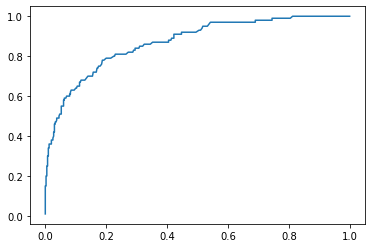

In [109]:
ROC(probabilities, [0.2,0.2,0.2,0.2,0.2], 5, Actual)

In [116]:
df_confusion = pd.crosstab(np.array(Actual), np.array(predictions))#, rownames=['Actual'], colnames=['Predicted'])

In [117]:
df_confusion

col_0,0,1,2,3,4
row_0,,,,,
0,6,5,0,9,0
1,5,15,0,0,0
2,0,2,16,2,0
3,0,2,1,17,0
4,1,2,2,5,10
